In [ ]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
import numpy as np

In [ ]:
dt = 0.0002    # Time spacing
N = 1/dt      # Maximum time plotted
t = np.arange(-N/2, N/2 + 1) * dt   # Time increments
f0 = 20       # Frequency excited

rf_sinusoid = np.exp(1j * 2*np.pi * f0 * t) # Complex sinusoid
f = np.arange(-N/2, N/2 + 1)/(N * dt)
FT_sinusoid = np.fft.fftshift(np.fft.fft(rf_sinusoid)) # FFT of the complex sinusoid

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


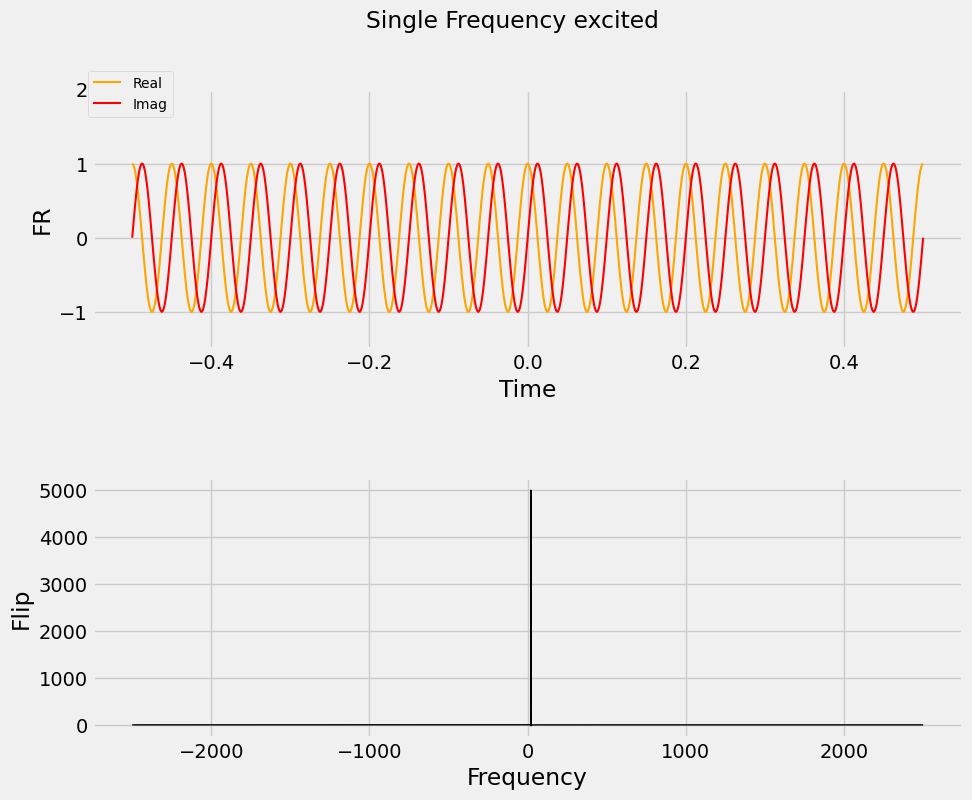

In [ ]:
plt.rcParams["figure.figsize"] = (10,8)

fig, axs = plt.subplots(2)
fig.suptitle('Single Frequency excited')
plt.subplots_adjust(hspace=0.5)

axs[0].plot(t, rf_sinusoid.real, "orange", label="Real", linewidth=1.5)
axs[0].plot(t, rf_sinusoid.imag, "-r", label="Imag", linewidth=1.5)
axs[0].legend(fontsize="10",bbox_to_anchor=(0.1,1.1))
axs[0].set_ylim([-1.5, 2])
axs[0].set_xlabel("Time")
axs[0].set_ylabel("FR")
axs[1].plot(f, FT_sinusoid, "black", linewidth=1)
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Flip")

plt.show()

In [ ]:
# Excitation of a slice with a bandwidth of sequences:

dt = 0.002    # Time spacing
N = 3/dt      # Maximum time plotted
t = np.arange(-N/2, N/2 + 1) * dt   # Time increments

f0 = 20                     # Central frequency
df = np.arange(-5, 5 + 1)   # array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

time, frequencies = np.meshgrid(t, df + f0)

rf_all = np.exp(1j* 2 *np.pi * frequencies * time) # Complex sinusoids for each combination of frequency and time points.

f = np.arange(-N/2, N/2 + 1) / (N * dt) # integer multiples of the fundamental frequency 2π/n (Fourier frequencies)

Bw = 1     # How many of the sinusoids, corresponding to different frequencies are used.

min = int(np.round(rf_all.shape[0]/2) - Bw) - 1
max = int(np.round(rf_all.shape[0]/2) + Bw)

rf_n = sum(rf_all[min: max,:],1)

FT_n = np.fft.fftshift(np.fft.fft(rf_n))

/usr/local/lib/python3.9/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


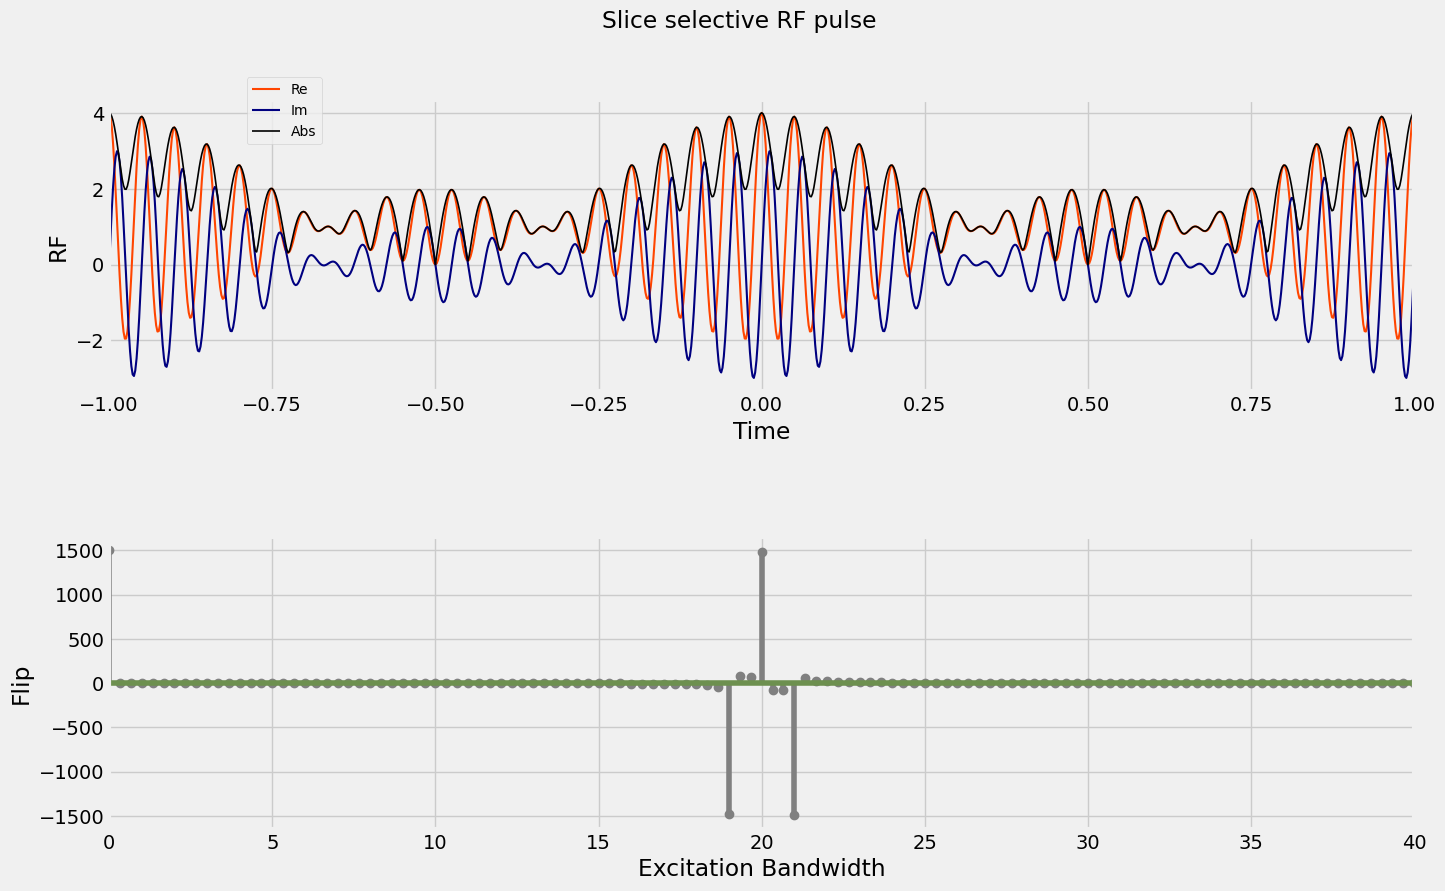

In [ ]:
plt.rcParams["figure.figsize"] = (15,9)

fig, axs = plt.subplots(2)
fig.suptitle('Slice selective RF pulse')
plt.subplots_adjust(hspace=0.5)

axs[0].plot(t, rf_n.real, "orangered", label = "Re", linewidth=1.5)
axs[0].plot(t, rf_n.imag, "navy", label = "Im", linewidth=1.5)
axs[0].plot(t, abs(rf_n), "black",label = "Abs", linewidth=1.2)
axs[0].set_xlim([-1, 1])
axs[0].legend(fontsize="10",bbox_to_anchor=(0.1,1.1))
axs[0].set_xlabel("Time")
axs[0].set_ylabel("RF")

axs[1].stem(f, FT_n, linefmt='grey')
axs[1].set_xlim([0, 40])
axs[1].set_xlabel("Excitation Bandwidth")
axs[1].set_ylabel("Flip")

plt.show()

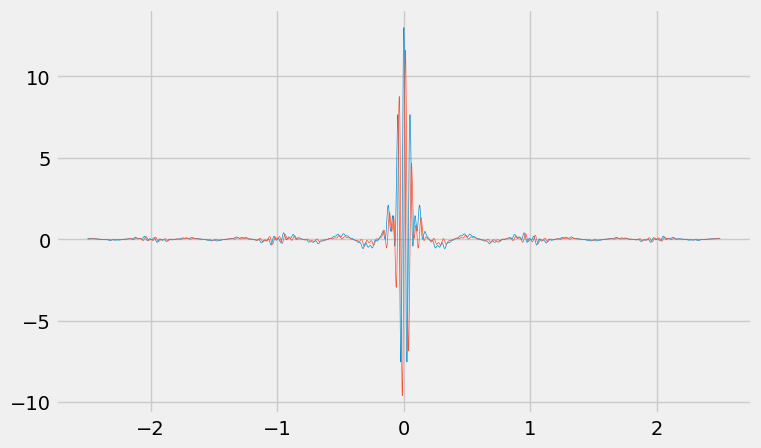

In [ ]:
# Designing a RF with an envelop function:

plt.rcParams["figure.figsize"] = (8,5)
dt = 0.0002    # Time spacing
N = 5/dt      # Maximum time plotted
t = np.arange(-N/2, N/2 + 1) * dt   # Time increments

f0 = 20                     # Central frequency
df = np.arange(-5, 5 + 1)   # array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

time, frequencies = np.meshgrid(t, df + f0)

rf_all = np.exp(1j* 2 *np.pi * frequencies * time) # Complex sinusoids for each combination of frequency and time points.

f = np.arange(-N/2, N/2 + 1) / (N * dt) # integer multiples of the fundamental frequency 2π/n (Fourier frequencies)

Bw = 5     # How many of the sinusoids, corresponding to different frequencies are used.

min = int(np.round(rf_all.shape[0]/2) - Bw) - 1
max = int(np.round(rf_all.shape[0]/2) + Bw)

rf_n = sum(rf_all[min: max,:],1)

plt.plot(t, np.sinc(5*t) * (1 + rf_n.real), linewidth=0.5)
plt.plot(t, np.sinc(5*t) * (1 + rf_n.imag), linewidth=0.5)


plt.show()

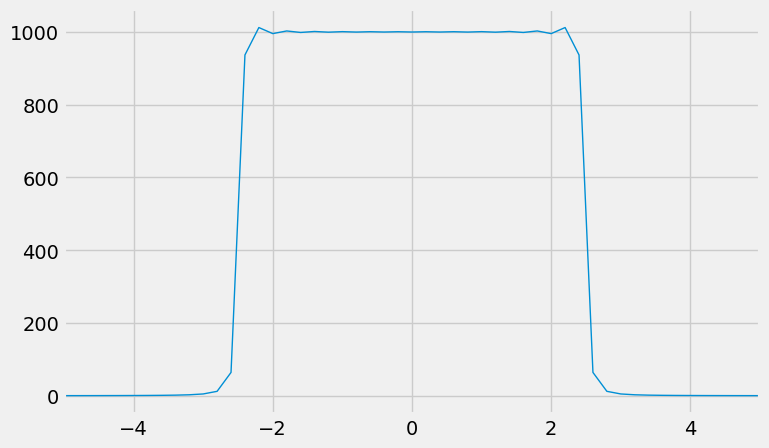

In [ ]:
plt.xlim([-5, 5])
plt.plot(f,abs(np.fft.fftshift(np.fft.fft(np.sinc(5*t)))), linewidth=1)